In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

In [7]:
# Definfir la funcion recursiva
def r_select(A, k):
    
    # Caso base
    if len(A)==1:
        return A[0]
    else:
        # Elgir un pivote al azar y separar
        p = random.choice(A)
        
        A_left = A[A<p]
        A_right = A[A>p]
        
        # Localizacion del pivote respecto al arreglo
        l = len(A_left)
        #print(p, "  ", l, "  ", k)
        
        # Elegir de acuerdo al pivote
        if k==l:
            return p
        elif k<l:
            return r_select(A_left, k)
        else:
            return r_select(A_right, k - l - 1)
        

In [10]:
# Casos a probar
L = [10, 100, 1000, 10000, 100000]

# Muestras por caso
N = 10

# Guardar resultados
R = np.zeros((len(L), N))

i = 0
for l in L:
    for n in range(N):
        # Muestreo sin remplazo
        S = np.random.choice(range(l*10),
                             size=l,
                             replace=False)
        ti = time.time()
        r_select(S, math.floor(l/2))
        R[i, n] = time.time() - ti
    i += 1


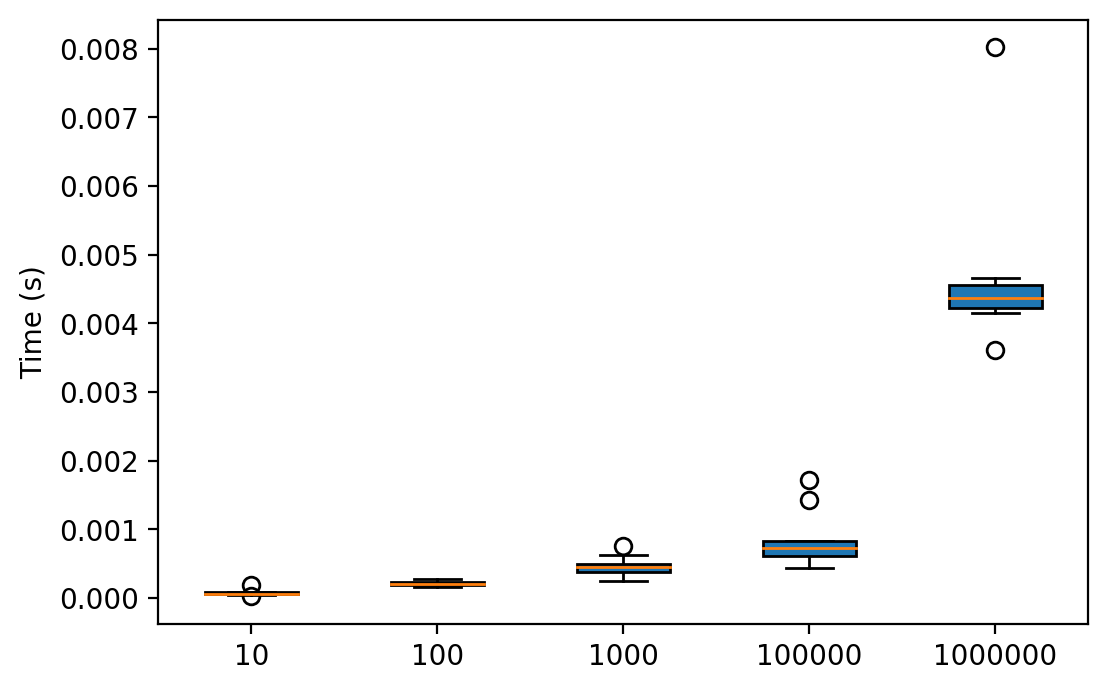

In [11]:
plt.figure(figsize=(6,4), dpi=200)
plt.boxplot(R.T,
           patch_artist=True,
           labels=["10","100","1000", "100000", "1000000"])
plt.ylabel("Time (s)")
plt.show()